### 第三题的数学建模过程

#### 目标

在问题三中，我们需要在问题二的基础上进一步考虑现实生活中的各种农作物之间的可替代性和互补性。还需要考虑预期销售量、销售价格、种植成本之间的相关性。这意味着我们需要构建一个更复杂的优化模型，能够反映这些相关性及其对农作物种植策略的影响。

#### 决策变量

定义决策变量 $x_{i,j,y}$，表示在地块 $i$ 上种植作物 $j$ 在年份 $y$ 的种植面积（单位：亩）。

#### 目标函数

优化问题的目标函数可以表示为：

$$
\text{Maximize:} \quad Z = \sum_{i} \sum_{j} \sum_{y} \left( (P_j^y \cdot Y_j^y - C_j^y) \cdot x_{i,j,y} + D_j^y \cdot \max(0, Y_j^y \cdot x_{i,j,y} - S_j^y) \right)
$$

其中：

- $Z$ 表示总净收益，即我们希望最大化的目标值。
- $P_j^y$ 表示作物 $j$ 在年份 $y$ 的销售单价（单位：元/斤），不同种类作物的售价随时间变化。
- $Y_j^y$ 表示作物 $j$ 在年份 $y$ 的亩产量（单位：斤/亩），由于气候等因素影响，每年可能会变化。
- $x_{i,j,y}$ 表示在地块 $i$ 上种植作物 $j$ 在年份 $y$ 的种植面积（单位：亩）。
- $C_j^y$ 表示作物 $j$ 在年份 $y$ 的种植成本（单位：元/亩），种植成本每年增长约5%。
- $D_j^y$ 表示作物 $j$ 超出预期销售量后的折扣价格（单位：元/斤），按2023年价格的50%计算。
- $S_j^y$ 表示作物 $j$ 在年份 $y$ 的预期销售量（单位：斤），不同作物的预期销售量根据作物类别随时间变化。

目标函数的第一部分 $(P_j^y \cdot Y_j^y - C_j^y) \cdot x_{i,j,y}$ 表示在每块地上每种作物的净收益，第二部分 $D_j^y \cdot \max(0, Y_j^y \cdot x_{i,j,y} - S_j^y)$ 表示超出预期销售量的作物的折扣收入。

#### 参数不确定性

1. **销售量、销售价格与种植成本的相关性**

在问题三中，我们综合考虑了种植成本、销售价格和销售量之间的相关性。相关性矩阵用于量化这些变量之间的关系，帮助调整模型中的参数。具体而言，相关性矩阵中的元素代表以下几种关系：

- **种植成本与销售价格的相关性**
- **种植成本与销售量的相关性**
- **销售价格与销售量的相关性**

2. **作物之间的替代性与互补性**

在实际农业生产中，不同作物之间可能存在替代性和互补性。为了解决这个问题，模型通过考虑以下两个方面来调整作物的种植策略：

- **替代性**：

  替代性指的是在某些条件下，一种作物可以替代另一种作物进行种植。例如，当市场价格变化或某种作物的种植成本增加时，农民可能会选择种植其他作物。模型通过调整种植面积和选择不同作物组合来模拟这种替代关系。假设两种作物 \(A\) 和 \(B\) 之间的替代性用参数 \(\alpha\) 表示，则作物 \(A\) 和 \(B\) 的种植面积之间的关系可以表示为：

  $$
  x_{A} = (1 - \alpha) \cdot x_{B}
  $$

  其中，\(\alpha \in [0, 1]\) 表示替代程度，当 \(\alpha = 1\) 时，作物完全可以互相替代；当 \(\alpha = 0\) 时，作物之间没有替代性。

- **互补性**：

  互补性指的是某些作物在轮作制度或混合种植中会相互促进。例如，在作物轮作制度下，不同作物的轮作可以改善土壤肥力。模型通过添加约束条件来反映互补性需求。例如，要求豆类作物在三年内至少种植一次。互补性约束可以表示为：

  $$
  \sum_{y=y_0}^{y_0+2} \sum_{j \in \text{Beans}} x_{i,j,y} \geq 1, \quad \forall i
  $$

  其中，\(\text{Beans}\) 表示豆类作物的集合，\(x_{i,j,y}\) 表示在地块 \(i\) 上种植作物 \(j\) 在年份 \(y\) 的种植面积（单位：亩）。

通过将替代性和互补性纳入模型，并结合相关性矩阵对变量进行调整。

#### 优化方法

我们可以通过构建线性规划模型来解决这个优化问题。在模型中，我们将通过相关性矩阵来考虑不同因素之间的相关性，并在模型的约束条件中引入作物的替代性和互补性。

### 约束条件

1. **地块面积约束**：每个地块的种植面积不能超过其总面积。

$$
\sum_{j} x_{i,j,y} \leq A_i, \quad \forall i, y
$$

其中：

- $A_i$ 表示地块 $i$ 的总面积（单位：亩），即该地块可用于种植的最大面积。

2. **最小种植面积约束**：非零种植面积不能小于某个最小面积。

$$
x_{i,j,y} \geq M \cdot \text{I}(x_{i,j,y} > 0), \quad \forall i, j, y
$$

其中：

- $M$ 表示最小种植面积（单位：亩），如 10% 的地块面积。
- $\text{I}(x_{i,j,y} > 0)$ 是指示函数，当 $x_{i,j,y} > 0$ 时，值为 1，否则为 0。

3. **三年内至少种植一次豆类作物**：在每个地块上，三年内至少种植一次豆类作物。

$$
\sum_{y=y_0}^{y_0+2} \sum_{j \in \text{Beans}} x_{i,j,y} \geq 1, \quad \forall i
$$

其中：

- $\text{Beans}$ 表示豆类作物的集合。

4. **销量约束**：确保每种作物的总产量不超过预期销售量。

$$
Y_j^y \cdot x_{i,j,y} \leq S_j^y, \quad \forall i, j, y
$$

5. **替代性和互补性约束**：

- 替代性约束：当一种作物种植面积增加时，另一种作物的种植面积应减少。例如，假设作物 A 和作物 B 是替代品，添加以下约束：

$$
x_{i,A,y} + \alpha x_{i,B,y} \leq \beta, \quad \forall i, y
$$

其中 $\alpha$ 和 $\beta$ 是调节参数，用于控制替代性强度。

- 互补性约束：当一种作物种植面积增加时，另一种作物的种植面积也应增加。例如，作物 C 和 D 是互补品，添加以下约束：

$$
x_{i,C,y} \geq \gamma x_{i,D,y}, \quad \forall i, y
$$

其中 $\gamma$ 是互补性强度参数。

### 优化流程

1. **构建目标函数**：
   - 根据每个作物的种植收益、成本以及价格的相关性，构建目标函数。
   
2. **建立约束条件**：
   - 包括地块面积约束、最小种植面积约束、豆类种植轮作约束、销量约束以及替代性和互补性约束。

3. **求解优化问题**：
   - 使用线性规划优化函数 `linprog`，输入目标函数和约束条件，求解最优种植策略。

4. **输出结果**：
   - 根据求解结果，输出每个地块在每年、每季的作物种植面积，并分析相关性对结果的影响。

/Users/yooky/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from current font.
  fig.canvas.draw()
/Users/yooky/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26893 (\N{CJK UNIFIED IDEOGRAPH-690D}) missing from current font.
  fig.canvas.draw()
/Users/yooky/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.draw()
/Users/yooky/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.draw()
/Users/yooky/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.draw()
/Users/yooky/anaconda3/lib/python3.11/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20137 (\N{CJK UNIF

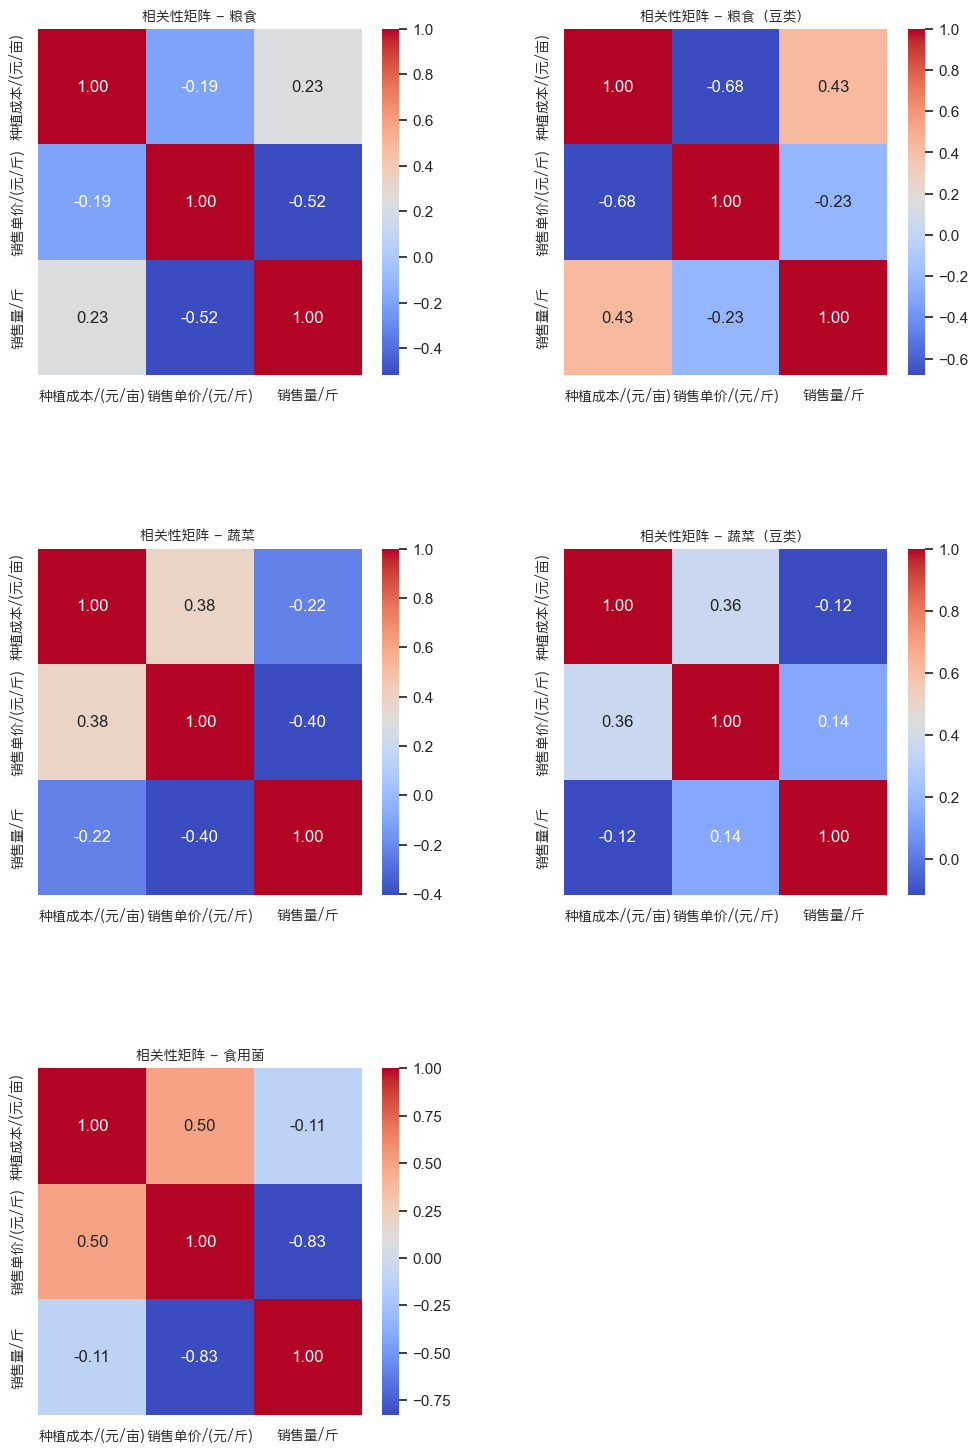

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

font_path = '/System/Library/Fonts/PingFang.ttc'
my_font = FontProperties(fname=font_path)

file_path = '2023年的种植数据与销售量.xlsx'
data = pd.read_excel(file_path, sheet_name=0)

# 计算销售价格
def calculate_sales_price(row):
    price_range = str(row).split('-')
    min_price = float(price_range[0])
    max_price = float(price_range[1])
    random_value = np.random.rand()
    return min_price + random_value * (max_price - min_price)

# 应用函数逐行计算销售价格
data['销售单价/(元/斤)'] = data['销售单价/(元/斤)'].apply(lambda x: calculate_sales_price(x))

# 提取每个作物类型下的作物名称，以及其他可能与产量和销售相关的变量
sem_data = data.groupby(['作物类型', '作物名称_x']).mean(numeric_only=True)

# 选择与产量和销售相关的变量
sem_data = sem_data[['种植成本/(元/亩)', '销售单价/(元/斤)', '销售量/斤']]

# 分别计算每个作物类型下变量的相关性
crop_type_correlations = {crop_type: group[['种植成本/(元/亩)', '销售单价/(元/斤)', '销售量/斤']].corr() 
                          for crop_type, group in data.groupby('作物类型')}

sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# 为每种作物类型绘制热力图
for (crop_type, matrix), ax in zip(crop_type_correlations.items(), axes.flatten()):
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, ax=ax)
    ax.set_title(f'相关性矩阵 - {crop_type}', fontproperties=my_font) 
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=my_font) 
    ax.set_yticklabels(ax.get_yticklabels(), fontproperties=my_font)

for i in range(len(crop_type_correlations), axes.size):
    axes.flatten()[i].set_visible(False)

plt.show()

In [2]:
from scipy.optimize import linprog
import random
import numpy as np
import pandas as pd

# 读取四个表格的数据
planting_data_file = '2023年的种植数据与销售量.xlsx'
crop_sales_file = '各作物聚合后销售量与价格.xlsx'
crop_land_file = '各作物适合种植的地块类型与季别.xlsx'
land_info_file = '乡村的现有耕地.xlsx'

# 加载表格
planting_data = pd.read_excel(planting_data_file)
crop_sales_data = pd.read_excel(crop_sales_file)
crop_land_data = pd.read_excel(crop_land_file)
land_info_data = pd.read_excel(land_info_file)

# 提取地块和作物信息
land_names = land_info_data['地块名称'].unique().tolist()

# 根据crop_land_data筛选适合第一季和第二季的作物
def get_suitable_crops(season):
    if season == '第一季':
        suitable_crops = crop_land_data[crop_land_data[f'水浇地{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'普通大棚{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'智慧大棚{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'平旱地'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'梯田'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'山坡地'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'水浇地'] == 1]['作物名称'].tolist()
    else:
        suitable_crops = crop_land_data[crop_land_data[f'水浇地{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'普通大棚{season}'] == 1]['作物名称'].tolist() + \
                         crop_land_data[crop_land_data[f'智慧大棚{season}'] == 1]['作物名称'].tolist()
    return suitable_crops

# 获取适合每季种植的作物
suitable_crops_first_season = get_suitable_crops('第一季')
suitable_crops_second_season = get_suitable_crops('第二季')

# 过滤不在suitable_crops中的作物
crops_first_season = [crop for crop in planting_data['作物名称_x'].unique() if crop in suitable_crops_first_season]
crops_second_season = [crop for crop in planting_data['作物名称_x'].unique() if crop in suitable_crops_second_season]

# 第二季可用的地块
land_names_second_season = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                            'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16',
                            'F1', 'F2', 'F3', 'F4']

# 随机选择作物的数量，减少计算量
max_crops_to_select = 9

# 为每个季节创建地块与作物的映射
def create_land_crop_mapping(land_names, crops):
    land_crop_mapping = {}
    for land in land_names:
        if len(crops) > max_crops_to_select:
            selected_crops = random.sample(crops, max_crops_to_select)
        else:
            selected_crops = crops  # 如果作物少于最大选择数量，则全部选中
        land_crop_mapping[land] = selected_crops
    return land_crop_mapping

# 第一季的作物与地块映射
land_crop_mapping_first_season = create_land_crop_mapping(land_names, crops_first_season)

# 第二季的作物与地块映射
land_crop_mapping_second_season = create_land_crop_mapping(land_names_second_season, crops_second_season)

# 相关性矩阵
correlation_matrix = {}
for crop_type, corr_matrix in crop_type_correlations.items():
    correlation_matrix[crop_type] = {
        'cost_price': corr_matrix.loc['种植成本/(元/亩)', '销售单价/(元/斤)'],
        'cost_quantity': corr_matrix.loc['种植成本/(元/亩)', '销售量/斤'],
        'price_quantity': corr_matrix.loc['销售单价/(元/斤)', '销售量/斤']
    }


# 定义生成随机参数的函数
def generate_random_parameters(crop):
    base_sales_volume = crop_sales_data[crop_sales_data['作物名称'] == crop]['销售量/斤'].values[0]
    base_yield = planting_data[(planting_data['作物名称_x'] == crop)]['亩产量/斤'].values[0]
    base_cost = planting_data[(planting_data['作物名称_x'] == crop)]['种植成本/(元/亩)'].values[0]
    base_price = crop_sales_data[crop_sales_data['作物名称'] == crop]['销售单价/(元/斤)'].values[0]

    # 根据作物类型设置相关性
    crop_type = planting_data[planting_data['作物名称_x'] == crop]['作物类型'].values[0]
    if crop_type in correlation_matrix:
        correlation = correlation_matrix[crop_type]
    else:
        correlation = {'cost_price': 0, 'cost_quantity': 0, 'price_quantity': 0}

    # 使用相关性调整随机参数的生成
    sales_volume_growth = np.random.uniform(0.90, 1.15) * (1 + correlation['price_quantity']) if crop not in ['小麦', '玉米'] else np.random.uniform(1.05, 1.20)
    yield_variation = np.random.uniform(0.85, 1.15) * (1 + correlation['cost_quantity'])
    cost_increase = np.random.uniform(0.03, 0.12) * (1 + correlation['cost_price'])

    if crop in ['食用菌', '羊肚菌']:
        price_decrease = np.random.uniform(0.02, 0.06) if crop == '食用菌' else 0.05
        price_per_unit = base_price * (1 - price_decrease)
    else:
        price_increase = np.random.uniform(0.04, 0.12)
        price_per_unit = base_price * (1 + price_increase)

    sales_volume = base_sales_volume * sales_volume_growth
    yield_per_acre = base_yield * yield_variation
    cost_per_acre = base_cost * (1 + cost_increase)

    return sales_volume, yield_per_acre, cost_per_acre, price_per_unit

def optimize_land_crop(land_crop_mapping, crops, season, year, apply_sales_constraint=True):
    # 初始化目标函数系数
    objective_coeffs = []
    decision_vars = []

    for land, selected_crops in land_crop_mapping.items():
        for crop in selected_crops:
            decision_vars.append((crop, land))

            # 使用 generate_random_parameters 生成随机参数
            sales_volume, yield_per_acre, cost_per_acre, price_per_unit = generate_random_parameters(crop)
            net_revenue = (yield_per_acre * price_per_unit) - cost_per_acre
            objective_coeffs.append(net_revenue)

    objective_coeffs = np.array(objective_coeffs) * -1

    # 约束条件构建
    A_ub = []
    b_ub = []

    # 地块面积约束
    for land in land_crop_mapping.keys():
        constraint = np.zeros(len(decision_vars))
        for i, (crop, land_name) in enumerate(decision_vars):
            if land_name == land:
                constraint[i] = 1
        A_ub.append(constraint)
        b_ub.append(land_info_data[land_info_data['地块名称'] == land]['地块面积/亩'].values[0])

    # 最小种植面积约束
    for land in land_crop_mapping.keys():
        min_area = 0.1 * land_info_data[land_info_data['地块名称'] == land]['地块面积/亩'].values[0]
        for crop in land_crop_mapping[land]:
            constraint = np.zeros(len(decision_vars))
            for i, (crop_name, land_name) in enumerate(decision_vars):
                if crop_name == crop and land_name == land:
                    constraint[i] = -1
            A_ub.append(constraint)
            b_ub.append(-min_area)

    # 销量约束条件：确保每种作物的总产量不超过预期销售量
    if apply_sales_constraint:
        for crop in crops:
            max_sales_volume = crop_sales_data[crop_sales_data['作物名称'] == crop]['销售量/斤'].values[0]
            constraint = np.zeros(len(decision_vars))
            for i, (crop_name, land_name) in enumerate(decision_vars):
                if crop_name == crop:
                    yield_data = planting_data[(planting_data['作物名称_x'] == crop)]['亩产量/斤'].values[0]
                    constraint[i] = yield_data
            A_ub.append(constraint)
            b_ub.append(max_sales_volume)

    # 运行线性规划
    A_ub = np.array(A_ub)
    b_ub = np.array(b_ub)
    result = linprog(c=objective_coeffs, A_ub=A_ub, b_ub=b_ub, method='highs')

    if result.success:
        optimal_areas = result.x
        solution = {}
        
        for i, (crop, land) in enumerate(decision_vars):
            if land not in solution:
                solution[land] = {}
            solution[land][crop] = optimal_areas[i]

        # 确保结果表格中包含所有作物
        all_crops = sorted(set(crop_sales_data['作物名称'].to_list()))  # 所有作物的集合（去重并排序）

        # 构建结果表格
        results = pd.DataFrame(columns=['年', '季别', '地块名'] + all_crops)

        for land, crop_areas in solution.items():
            season_data = {'年': year, '季别': season, '地块名': land}
            for crop in all_crops:
                season_data[crop] = crop_areas.get(crop, 0)  # 如果该作物不在该地块中，则面积为0
            
            results = results._append(season_data, ignore_index=True)

        return results
    else:
        return pd.DataFrame()

def calculate_results_randomly_for_years(apply_sales_constraint=True):
    all_results = []
    
    for i in range(7):
        random.seed(42 + i)
        np.random.seed(42 + i)
        
        # 计算每一次的种植策略
        first_season_result = optimize_land_crop(land_crop_mapping_first_season, crops_first_season, '第一季', 2023 + i, apply_sales_constraint)
        second_season_result = optimize_land_crop(land_crop_mapping_second_season, crops_second_season, '第二季', 2023 + i, apply_sales_constraint)
        combined_result = pd.concat([first_season_result, second_season_result], ignore_index=True)
        all_results.append(combined_result)
    
    years = list(range(2024, 2031))
    random.shuffle(years)
    
    results = {year: all_results[i].assign(年=year) for i, year in enumerate(years)}
    return results

# 计算结果并保存
results = calculate_results_randomly_for_years(apply_sales_constraint=False)

# 输出结果
for year, result in results.items():
    print(f"Results for year {year}:")
    print(result.head(), "\n")

Results for year 2030:
      年   季别 地块名 刀豆   包菜   南瓜   土豆 大白菜   大麦 小青菜  ... 豇豆 辣椒    青椒 香菇 高粱 黄心菜  \
0  2030  第一季  A1  0  8.0    0    0   0  8.0   0  ...  0  0   8.0  0  0   0   
1  2030  第一季  A2  0  0.0    0    0   0  0.0   0  ...  0  0   5.5  0  0   0   
2  2030  第一季  A3  0  3.5    0  3.5   0  0.0   0  ...  0  0   0.0  0  0   0   
3  2030  第一季  A4  0  0.0  7.2  7.2   0  0.0   0  ...  0  0  14.4  0  0   0   
4  2030  第一季  A5  0  0.0    0  6.8   0  6.8   0  ...  0  0   0.0  0  0   0   

     黄瓜   黄豆   黍子   黑豆  
0     0    0    0  8.0  
1  11.0  5.5    0  0.0  
2   7.0  3.5  3.5  0.0  
3     0    0    0  0.0  
4     0    0    0  0.0  

[5 rows x 45 columns] 

Results for year 2024:
      年   季别 地块名 刀豆   包菜   南瓜   土豆 大白菜   大麦 小青菜  ... 豇豆 辣椒   青椒 香菇 高粱 黄心菜  \
0  2024  第一季  A1  0  8.0    0    0   0  8.0   0  ...  0  0  8.0  0  0   0   
1  2024  第一季  A2  0  0.0    0    0   0  0.0   0  ...  0  0  5.5  0  0   0   
2  2024  第一季  A3  0  3.5    0  3.5   0  0.0   0  ...  0  0  0.0  0  0   0   
3 

In [3]:
results

{2030:        年   季别  地块名    刀豆    包菜   南瓜    土豆   大白菜   大麦   小青菜  ...    豇豆    辣椒  \
 0   2030  第一季   A1     0   8.0    0     0     0  8.0     0  ...     0     0   
 1   2030  第一季   A2     0   0.0    0     0     0  0.0     0  ...     0     0   
 2   2030  第一季   A3     0   3.5    0   3.5     0  0.0     0  ...     0     0   
 3   2030  第一季   A4     0   0.0  7.2   7.2     0  0.0     0  ...     0     0   
 4   2030  第一季   A5     0   0.0    0   6.8     0  6.8     0  ...     0     0   
 ..   ...  ...  ...   ...   ...  ...   ...   ...  ...   ...  ...   ...   ...   
 77  2030  第二季  E16   0.0  0.06    0  0.06  0.06    0     0  ...  0.06     0   
 78  2030  第二季   F1   0.0  0.06    0   0.0   0.0    0  0.06  ...  0.06     0   
 79  2030  第二季   F2   0.0  0.06    0   0.0  0.06    0  0.06  ...     0     0   
 80  2030  第二季   F3  0.06     0    0  0.06   0.0    0  0.06  ...     0  0.06   
 81  2030  第二季   F4  0.06  0.06    0   0.0   0.0    0     0  ...  0.06     0   
 
       青椒    香菇 高粱   黄心菜    黄瓜  

In [4]:
with pd.ExcelWriter('2024至2030年农作物种植方案_Q3.xlsx', engine='xlsxwriter') as writer:
    sorted_years = sorted(results.keys())
    
    for year in sorted_years:
        result = results[year].copy()
        del result['年']
        result.to_excel(writer, sheet_name=str(year), index=False)
        
print("结果已保存")

结果已保存
